---
# Zadaća 5
##### Rok za predaju: 7. travnja, 2021. u 23:59h
##### Način predaje: Teams->Strojno učenje->Assignment, predajete.ipynb datoteka (ili više datoteki u .zip) ili link na Google colab 

### Ime i prezime: Luka Strapač

---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

## Zadatak 1 (10)
Učitajte podatke `X_train_1.csv` i `y_train_1.csv` i `X_test_1.csv` i `y_test_1.csv`. Podatke trebamo opisati model funkcijom $h_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + \theta_4 x^4 + \theta_5 x^5$. <br> Kako bi pronašli odgovarajuće parametre koristite gradijentnu metodu. Zbog većeg broja značajki uvest ćemo regularizaciju. 

- Učitajte i prikažite podatke. Napravite odgovarajuću matricu dizajna. 
- Pokretat ćete gradijentnu metodu s različitim izborima parametra $\lambda$. Odaberite $\lambda = 0,10,20,\cdots, 200$. Za svaki izbor $\lambda$
    - natrenirajte model
    - izračunajte pogrešku na trening skupu
    - izračunajte pogrešku na test skupu
- Nacrtajte graf ovisnosti pogreške regularizacijskom koeficijentu $\lambda$ na trening skupu o i ovisnosti pogreškeo regularizacijskom koeficijentu $\lambda$ na testnom skupu. 
- Što možete zaključiti? Koliki $\lambda$ biste odabrali? Obrazložite. 

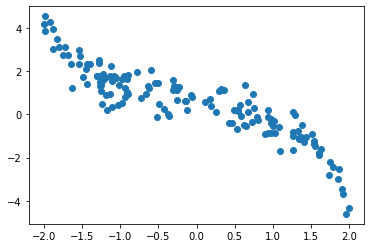

lambda = 0
Pogreska na trening skupu: 0.134383283833542
Pogreska na testnom skupu 0.14903121875601785
lambda = 10
Pogreska na trening skupu: 0.1353686545625144
Pogreska na testnom skupu 0.14646221620269886
lambda = 20
Pogreska na trening skupu: 0.13696306065919592
Pogreska na testnom skupu 0.14515810776032234
lambda = 30
Pogreska na trening skupu: 0.13891064448461513
Pogreska na testnom skupu 0.14468065685364676
lambda = 40
Pogreska na trening skupu: 0.14106147652567588
Pogreska na testnom skupu 0.14475619199990822
lambda = 50
Pogreska na trening skupu: 0.14332094452903538
Pogreska na testnom skupu 0.1452059705462392
lambda = 60
Pogreska na trening skupu: 0.14562679672176945
Pogreska na testnom skupu 0.14590954578996415
lambda = 70
Pogreska na trening skupu: 0.14793728063621714
Pogreska na testnom skupu 0.14678390552263695
lambda = 80
Pogreska na trening skupu: 0.15022428648903377
Pogreska na testnom skupu 0.14777087214352472
lambda = 90
Pogreska na trening skupu: 0.15246904945609469
P

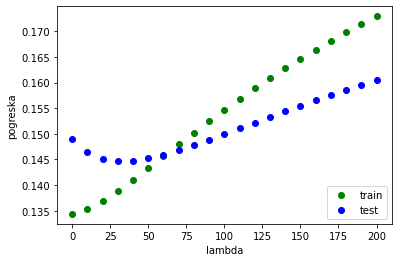

In [4]:
def gradientMethod(X,Y,lam,alpha, numIter): 
    m = X.shape[0]
    n = X.shape[1]
    theta =  np.zeros((n,1))
    for i in range(numIter):
        XThetaY = X.dot(theta)-Y 
        gradJ = (X.T.dot(XThetaY))/m
        theta[0] = theta[0] - alpha*gradJ[0]
        theta[1:] = theta[1:]*(1 - alpha*lam/m) - alpha*gradJ[1:] 
    return theta


def cost(theta, X, y):
    XThetaY = X.dot(theta)-y
    return ((1/(2*y.shape[0]))*(XThetaY.T.dot(XThetaY)))[0][0]


X_train = pd.read_csv("X_train_1.csv").to_numpy()
y_train = pd.read_csv("y_train_1.csv").to_numpy()
X_test = pd.read_csv("X_test_1.csv").to_numpy()
y_test = pd.read_csv("y_test_1.csv").to_numpy()

plt.scatter(X_train,y_train)
plt.show()

md_train = np.ones((X_train.shape[0], 1))
md_test = np.ones((X_test.shape[0], 1))

for i in range(1, 6):
    md_train = np.concatenate((md_train, np.power(X_train, i)), axis = 1)
    md_test = np.concatenate((md_test, np.power(X_test, i)), axis = 1)
    
for i in range(0, 210, 10):
    theta = gradientMethod(md_train, y_train, i, 0.01, 1000)
    print('lambda =', i)
    cost_train = cost(theta, md_train, y_train)
    cost_test = cost(theta, md_test, y_test)
    print('Pogreska na trening skupu:', cost_train)
    print('Pogreska na testnom skupu', cost_test)
    plt.scatter(i, cost_train, c='g')
    plt.scatter(i, cost_test, c='b')
plt.xlabel('lambda')
plt.ylabel('pogreska')
plt.legend(('train', 'test'), loc=4)
plt.show()

#Zaključujem da ne valja ni kada je lambda prevelik, ni kada je premali, te bi odabrao lambda ~ 40 jer ima najmanju pogrešku za testni skup


## Zadatak 2 (10)

Neka je zadan klasifikacijski problem na podacim $X \in \mathbb{R}^{m\times }$ s pripadnim oznakama $y\in \mathbb{R}^m$, gdje je svaki $y_i \in \{ 0,1\}$. <br>
Raspišite kako izgleda regularizirana funkcija $J(\theta)$ za logističku regresiju, njen gradijent te korak ažuriranja. 

---

Učitajte i prikažite podatke `X_train_2` i `y_train_2`. <br>

<br>
Za model funkciju uzimamo polinom $6$-tog stupnja, koristeći sklearn.PolynomialFeatures transformirajte podatke. <br>

Modificirajte gradijentnu metodu (s regularizacijom) tako da iterirate dokle god je razlika u pogreški manja od $10e^{-8}$. Stopu učenja fiksirajte na $0.001$. Natrenirajte vaše podatke s različitim izborom $\lambda = 0, 1, 100$. Za svaki slučaj treniranje 
- nacrajte pripadni graf koji sadrži podatke i granicu, ispišite 
- ispišite točnost (accuracy)
- ispište broj iteracija koji se izvrtio

Što možete zaključiti? 

$$
J(\theta) = -[\frac{1}{m}\sum\limits_{i=1}^{m}y^{(i)}log(h_\theta(x^{(i)}))+(1-y^{(i)})log(1-h_\theta(x^{(i)}))] + \frac{\lambda}{2m}\sum\limits_{j=1}^{n}\theta_j^2 \\
\frac{\partial}{\partial\theta_k}ln(h_\theta(x^{(i)})) = \frac{\partial}{\partial\theta_k}ln\frac{1}{1+e^{-\theta^Tx^{(i)}}} = (1+e^{-\theta^Tx^{(i)}})\frac{1}{(1+e^{-\theta^Tx^{(i)}})^2}e^{-\theta^Tx^{(i)}}x_k^{(i)} = x_k^{(i)}\frac{e^{-\theta^Tx^{(i)}}}{1+e^{-\theta^Tx^{(i)}}} = x_k^{(i)}(1-h_\theta(x^{(i)})) \\
\frac{\partial}{\partial\theta_k}ln(1-h_\theta(x^{(i)})) = 
\frac{\partial}{\partial\theta_k}ln\frac{e^{-\theta^Tx^{(i)}}}{1+e^{-\theta^Tx^{(i)}}} = \frac{\partial}{\partial\theta_k}ln(e^{-\theta^Tx^{(i)}})+\frac{\partial}{\partial\theta_k}ln\frac{1}{1+e^{-\theta^Tx^{(i)}}} = -x_k^{(i)} + x_k^{(i)}(1-h_\theta(x^{(i)})) =  -x_k^{(i)} h_\theta(x^{(i)})\\
\frac{\partial}{\partial\theta_k}\frac{\lambda}{2m}\sum\limits_{j=1}^{n}\theta_j^2 = \frac{\lambda}{m}\theta_k\\
\frac{\partial J}{\partial\theta_k} = \frac{1}{m}\sum\limits_{i=1}^{m}x_k^{(i)}(h_\theta(x^{(i)})-y^{(i)}) + \frac{\lambda}{m}\theta_k \\
\nabla J = [\frac{\partial J}{\partial \theta_k}]^T, k = 1, \dots,n\\
\theta^{(k+1)} \leftarrow \theta^{(k)} - \alpha\nabla J(\theta)\\
\theta^{(k+1)} \leftarrow \theta^{(k)}(1-\frac{\lambda}{m}) - \alpha[\frac{1}{m}\sum\limits_{i=1}^{m}x_l^{(i)}(h_\theta(x^{(i)})-y^{(i)})]^T, \\ l = 1, \dots,n
$$

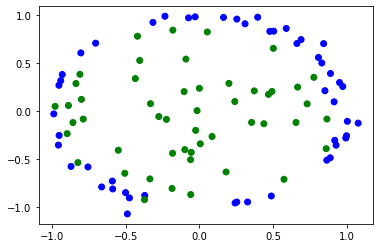

lambda = 0


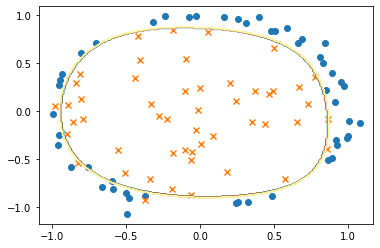

accuracy = 0.94
broj iteracija = 488770
lambda = 1


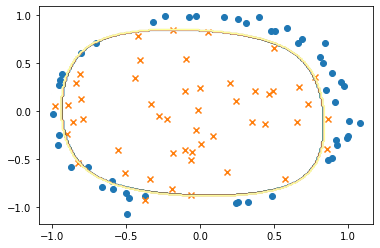

accuracy = 0.91
broj iteracija = 190399
lambda = 100


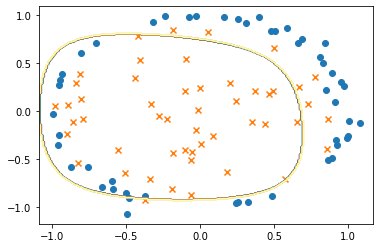

accuracy = 0.76
broj iteracija = 9991


In [5]:
def gradientMethodLogReg(X,Y,lam,alpha): 
    m = X.shape[0]
    n = X.shape[1]
    theta =  np.zeros((n,1))
    cost = []
    cost.append(-np.sum(Y*np.log(g(X.dot(theta))) + (1-Y)*np.log(1 - g(X.dot(theta))))/m)
    i = 1
    while True:
        XThetaY = g(X.dot(theta))-Y 
        gradJ = (X.T.dot(XThetaY))/m
        theta[0] = theta[0] - alpha*gradJ[0]
        theta[1:] = theta[1:]*(1 - alpha*lam/m) - alpha*gradJ[1:]
        cost.append(-np.sum(Y*np.log(g(X.dot(theta))) + (1-Y)*np.log(1 - g(X.dot(theta))))/m)
        if (abs(cost[i] - cost[i - 1])) < 10e-8:
            break
        i += 1
    return theta, i

def plot_boundary(theta, X, y, grid_step=.01, poly_featurizer=None):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),np.arange(y_min, y_max, grid_step))
    
    #Z = theta.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z=(np.sign(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]).dot(theta))+1)/2
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    
    X_p = np.array([X[i] for i in range(X.shape[0]) if y[i]==1])
    X_n = np.array([X[i] for i in range(X.shape[0]) if y[i]==0])
    plt.scatter(X_p[:,0],X_p[:,1], marker='o', label='')
    plt.scatter(X_n[:,0],X_n[:,1],marker='x', label='')

def g(z):
    return 1/(1 + np.exp(-z))

X = pd.read_csv("X_train_2.csv").to_numpy()
y = pd.read_csv("y_train_2.csv").to_numpy()

y = np.array([1 if ips == 1 else 0 for ips in y]).reshape((y.shape[0], 1))
colors = ['g' if ips == 0 else 'b' for ips in y]

plt.scatter(X[:, 0], X[:, 1], color = colors)
plt.show()

poly = PolynomialFeatures(6).fit(X)
md = poly.transform(X)

print('lambda = 0')
theta0, i0 = gradientMethodLogReg(md, y, 0, 0.001)
plot_boundary(theta0, X, y, poly_featurizer=poly)
plt.show()
y_pred0 = [0 if y < 0.5 else 1 for y in g(md.dot(theta0))]
print('accuracy =', accuracy_score(y, y_pred0))
print('broj iteracija =', i0)
print('lambda = 1')
theta1, i1 = gradientMethodLogReg(md, y, 1, 0.001)
plot_boundary(theta1, X, y, poly_featurizer=poly)
plt.show()
y_pred1 = [0 if y < 0.5 else 1 for y in g(md.dot(theta1))]
print('accuracy =', accuracy_score(y, y_pred1))
print('broj iteracija =', i1)
print('lambda = 100')
theta100, i100 = gradientMethodLogReg(md, y, 100, 0.001)
plot_boundary(theta100, X, y, poly_featurizer=poly)
plt.show()
y_pred100 = [0 if y < 0.5 else 1 for y in g(md.dot(theta100))]
print('accuracy =', accuracy_score(y, y_pred100))
print('broj iteracija =', i100)

#Za izbor lambda = 0, dobijemo najbolju točnost, ali mu treba puno iteracija.
#Za izbor lambda = 1,dobijemo nešto slabiju točnost, ali mu treba oko 2.5x manje iteracija.
#Za izbor lambda = 100, dobijemo znatno lošiju točnost od prva dva izbora, ali mu treba i znatno manje iteracija.

## Zadatak 3 (15)
U prošloj zadaći dobili ste skup podataka *mobile_price*. Podaci su sadržavali različite speficikacije mobitela, a zadatak je bio prema tim spefifikacijama svrstati mobitel u neki od cjenovnih rangova. <br>
Sada kada smo se upoznali s pojmom regularizacije, možemo ponoviti taj zadatak, ovaj puta sa regulariziranom softmax regresijom. <br>

1. Modificirajte implementaciju gradijetne metode s obzirom na dodani regularizacijski izraz.
2. Provedite postupak učenja modela na podacima. 
3. Testirajte model tako da ispišete neke od metrika poput točnosti.
4. Ispišite naučene parametre $\theta$ i usporedite ih sa parametrima koje ste dobili u prošloj zadaći kada niste koristili regularizaciju. Koja je razlika?

In [46]:

def h(z):
        return np.exp(z)/ np.sum(np.exp(z),axis=1).reshape(-1,1)
    
def indicator_function(y):
   
    y = y.reshape(-1,1)
    all_classes = np.arange(0,np.unique(y).shape[0])
    return ((y[:]==all_classes)*1).reshape(-1,np.unique(y).shape[0])
    
def cost_function(X,y,lam,theta):
    m = X.shape[0]
    thetaX = X.dot(theta)
    hx = h(thetaX)
    I = indicator_function(y)
    gradijent= (-1.0)*np.dot(X.T,I-hx)
    
    cost = -1.0 * np.sum(np.sum(I*np.log(h(thetaX)),axis=1)) + (lam/(2*m))*theta[1:].T.dot(theta[1:])
    return cost, gradijent
   
def pred(X,y,theta):  
    X = np.column_stack([np.ones([X.shape[0]]), X])
    thetaX = np.dot(theta.T,X.T)
    Ynew = np.argmax(thetaX,axis=0) 
    return Ynew
    
def softMaxRegularized(X, y,lam, alpha, numIter):
    m = X.shape[0]
    k = np.unique(y).shape[0]
    X = np.column_stack([np.ones([m]), X])
    
    y = y.reshape(-1,1)
    theta =  np.zeros((X.shape[1],k))
    
    cost_iterations = np.zeros(numIter)
    for i in range(numIter):
        c, grad = cost_function(X,y,lam,theta)
        theta = theta - alpha*grad
        theta[0] = theta[0] - alpha*grad[0]
        theta[1:] = theta[1:]*(1-alpha*(lam/m)) - alpha*grad[1:]
        #cost_iterations[i]=c
        
        cost_iterations[i] = c[0][0]
            
    return theta, cost_iterations

test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv") 
X_train,y_train = train.iloc[:,:-1], train.iloc[:,-1].to_numpy()

X_train = scale(X_train)

X_test,y_test = test.iloc[:,:-1], test.iloc[:,-1].to_numpy()

X_test = scale(X_test)


a,b = fit(X_train,y_train,0,0.001,100)


y_pred = pred(X_test,y_test,a)
print("theta:", a)
print("Točnost:",accuracy_score(y_test,y_pred))

theta: [[-2.52271350e+00  2.43225925e+00  2.43969997e+00 -2.34924572e+00]
 [-2.17701550e+00 -7.39904635e-01  7.08114721e-01  2.20880542e+00]
 [ 9.48729998e-03 -1.28648712e-02 -5.97136671e-04  3.97470787e-03]
 [ 8.25398520e-02 -2.20103478e-02 -3.00730497e-02 -3.04564544e-02]
 [ 7.31984071e-02  6.74220144e-03 -7.70804249e-02 -2.86018369e-03]
 [-6.25253580e-02  3.28073949e-03  4.69241237e-02  1.23204948e-02]
 [-2.12459970e-02  2.98060856e-02 -7.06473231e-02  6.20872344e-02]
 [-1.25089822e-01 -4.67602440e-02 -2.10098276e-02  1.92859894e-01]
 [ 1.10671022e-02  9.58588149e-02 -5.42844553e-02 -5.26414618e-02]
 [ 2.71671825e-01  1.37995732e-01  6.24224036e-03 -4.15909797e-01]
 [-1.02124345e-02 -1.09566759e-01  4.34023647e-02  7.63768290e-02]
 [-1.67132174e-03 -3.08992894e-02 -3.15614159e-03  3.57267527e-02]
 [-1.27750346e+00 -3.67846454e-01  3.97403881e-01  1.24794603e+00]
 [-1.24660699e+00 -4.62114182e-01  3.95473443e-01  1.31324773e+00]
 [-8.68970712e+00 -2.87055987e+00  2.89672745e+00  8.66

## Zadatak 4 (35)
Jedan veliki trgovački lanac se susreće s problemom da isti proizvodi budu različito kategorizirani u poslovnicama po svijetu. <br>
Kako bi riješili problem, skupili su podatke o proizvodima tako da su svaki podatak opisali pomoću $93$ različite varijable i ručno označili kojoj klasi pripada. <br>
Vaš cilj je na temelju tih podataka razviti model koji će uspješeno kategorizirati nove proizvode. 

Dana vam je datoteka `products_data_train.csv` i `products_data_test.csv` sa podacima za učenje i podacima za testiranje. <br>
Podaci sadrže prvi stupac - ID, a nakon toga $93$ stupca sa značajkama. <br>
Implementacija je potpuno proizvoljna. <br>

Vaš kod standardno predajte u Python bilježnici. <br>


Osim navedeno, priložena vam je datoteka `products_data_evaluate.csv` koja za razliku od ostalih datoteka ne sadrži stupac sa oznakama klasa. Nakon što ste napravili svoj model pokrenite ga na tom skupu podataka, a dobivene predikcije spremite u `products_data_evaluate_prediction.csv` i priložite rješenju zadaće. <br>

(Na tim predikcijama ćemo računati točnost vašeg modela i napraviti rang-ljestvicu :) )